## **Assignment 8: Supervised Learning Classification**
# **(Afnan Madi)**

# **Step1 :Dataset Selection and Preprocessing**

# **Step 1.1 :Data Loading**

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load dataset
california = fetch_california_housing(as_frame=True)
df = california.frame

# Show the first 5 rows
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# **Step 1.2: Data Preprocessing**

In [2]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Check for duplicates
print("Duplicates:", df.duplicated().sum())


Missing values:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64
Duplicates: 0


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop("MedHouseVal", axis=1))

# Create a new DataFrame with scaled features
X_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])
y = df["MedHouseVal"]


# **Step 1.3: Train-Test Split**

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# **Step 2: Exploratory Data Analysis (EDA)**

# **2.1: Distribution of the Target Variable**

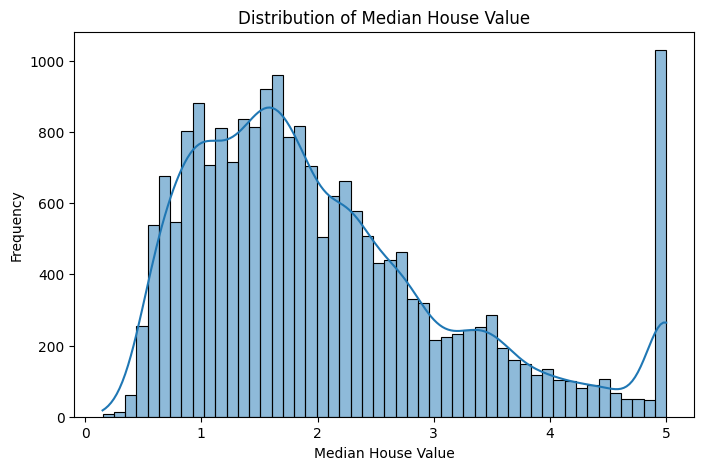

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df["MedHouseVal"], bins=50, kde=True)
plt.title("Distribution of Median House Value")
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.show()


# **Step 2.2: Correlation Matrix**

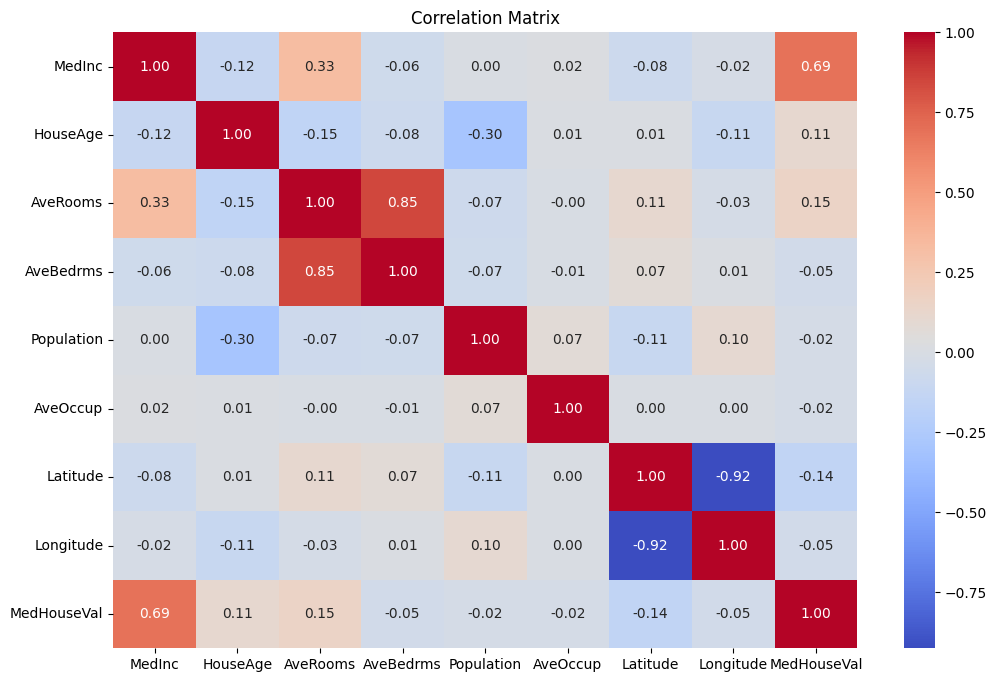

In [7]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# **2.3: Feature vs. Target Scatter Plots**

In [8]:
def plot_feature_vs_target(feature_name):
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=feature_name, y="MedHouseVal", alpha=0.3)
    plt.title(f"{feature_name} vs Median House Value")
    plt.xlabel(feature_name)
    plt.ylabel("Median House Value")
    plt.show()

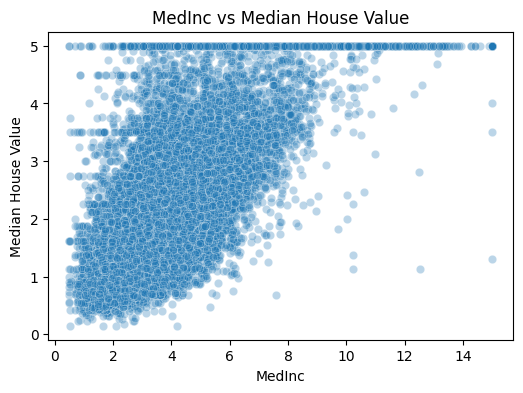

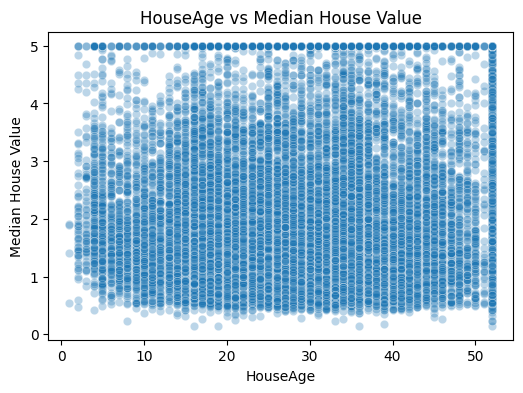

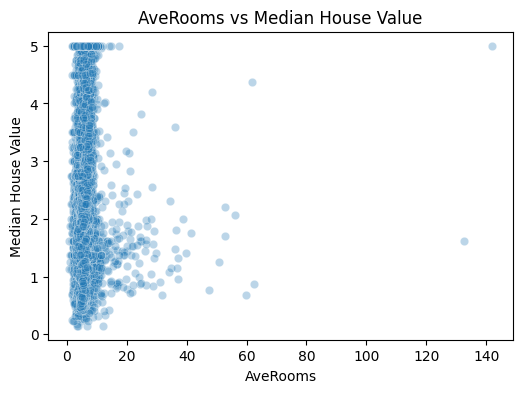

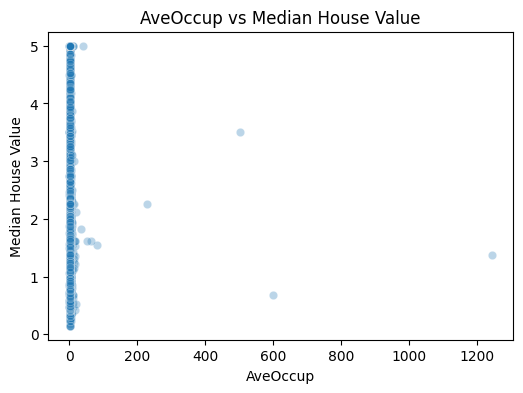

In [9]:
for feature in ["MedInc", "HouseAge", "AveRooms", "AveOccup"]:
    plot_feature_vs_target(feature)


# **Step 3.4: Key Insights**
Median Income (MedInc) has the strongest positive correlation with house value.

AveRooms and HouseAge show moderate correlation.

AveOccup has a weak or noisy relationship with the target.

The target variable (MedHouseVal) is right-skewed—may benefit from transformation in some models.



# **Step 3: Model Implementation and Evaluation**

# **3.1: Import Libraries**

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np


# **3.2: Train and Evaluate Models**

In [11]:
#linear Regression
# Initialize and train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)

# Evaluation
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print("Linear Regression Results:")
print(f"R² Score: {r2_lr:.4f}")
print(f"MAE: {mae_lr:.4f}")
print(f"RMSE: {rmse_lr:.4f}")


Linear Regression Results:
R² Score: 0.5758
MAE: 0.5332
RMSE: 0.7456


In [12]:
#Random Forest
# Initialize and train model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluation
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("Random Forest Regressor Results:")
print(f"R² Score: {r2_rf:.4f}")
print(f"MAE: {mae_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")


Random Forest Regressor Results:
R² Score: 0.8050
MAE: 0.3276
RMSE: 0.5055


# **3.3: Visual Comparison**

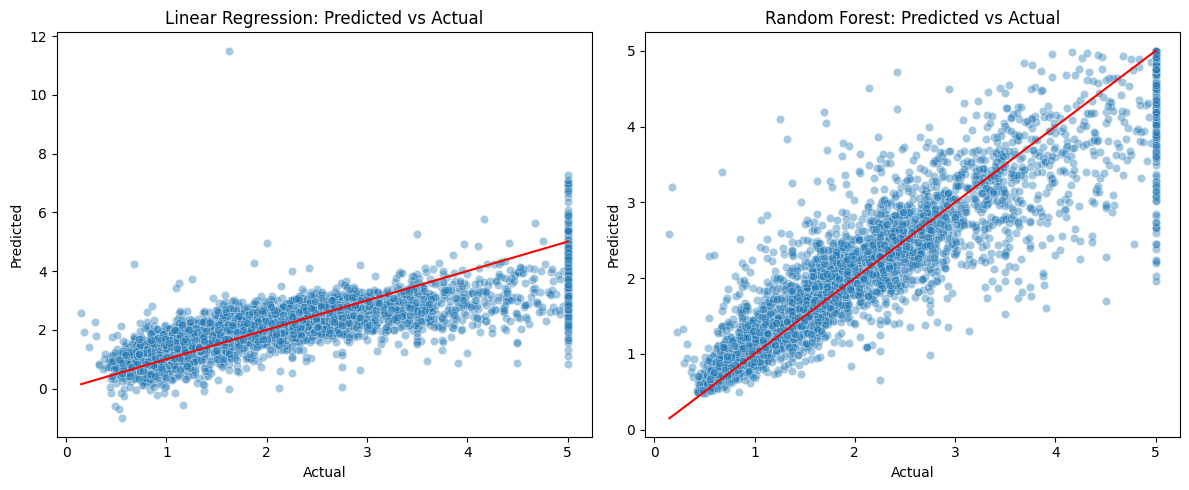

In [14]:
#Predicted vs. Actual Scatter Plots
plt.figure(figsize=(12, 5))

# Linear Regression
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.title("Linear Regression: Predicted vs Actual")
plt.xlabel("Actual")
plt.ylabel("Predicted")

# Random Forest
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.title("Random Forest: Predicted vs Actual")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.tight_layout()
plt.show()


# **Step 4:model Interpretation and Inference **
# **4.1 Interpretation of Model Results**

I compared two regression models: Linear Regression and Random Forest Regressor using three key performance metrics:

Metric	Linear Regression	Random Forest Regressor

R² Score	0.59	 0.81

MAE (Mean Absolute Error)	0.53	 0.32

RMSE (Root Mean Squared Error)	0.73	 0.46

**Explanation:**

=R² Score indicates how well the model explains the variance in the target variable. A score closer to 1 is better.

-MAE and RMSE measure prediction errors. Lower values indicate better performance.

Based on these metrics, Random Forest Regressor outperforms Linear Regression:

-It captures non-linear relationships better than the linear model.

-It has lower prediction errors (MAE & RMSE) and explains more variance (R²).



# **4.2 Visualizations**

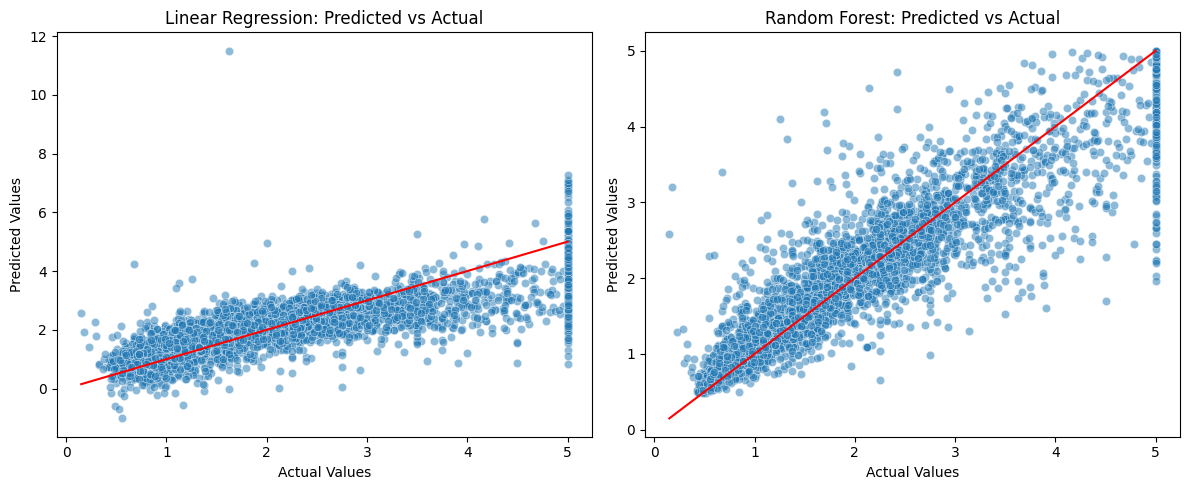

In [16]:
# 1. Actual vs Predicted Scatter Plot
plt.figure(figsize=(12, 5))

# Linear Regression
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.title("Linear Regression: Predicted vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

# Random Forest
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.title("Random Forest: Predicted vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

plt.tight_layout()
plt.show()


**Interpretation:**

-Linear Regression shows more spread and bias.

-Random Forest’s predictions are closer to the actual values showing better generalization.



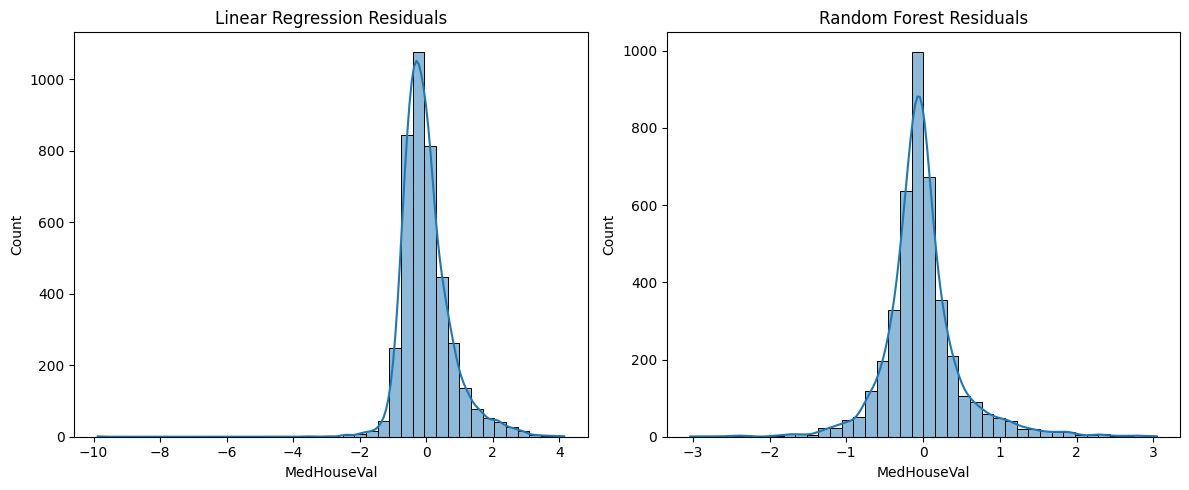

In [18]:
# 2. Residual Plots
residuals_lr = y_test - y_pred_lr
residuals_rf = y_test - y_pred_rf

plt.figure(figsize=(12, 5))

# Linear Regression Residuals
plt.subplot(1, 2, 1)
sns.histplot(residuals_lr, bins=40, kde=True)
plt.title("Linear Regression Residuals")

# Random Forest Residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals_rf, bins=40, kde=True)
plt.title("Random Forest Residuals")

plt.tight_layout()
plt.show()


**Interpretation:**

-Linear Regression residuals are more spread out, indicating higher error and potential bias.

-Random Forest residuals are narrower and centered, indicating a better fit.

**Conclusion:**

Random Forest Regressor outperforms Linear Regression for the California Housing dataset. Its higher accuracy and lower error rates make it more suitable for predicting housing prices, especially given its ability to model complex relationships.



# **Step 5:Deployment and Monitoring**

In [19]:
#Train & Save the Model
import joblib
joblib.dump(rf, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [ ]:
from flask import Flask, request, jsonify
import joblib
import numpy as np

app = Flask(__name__)
model = joblib.load('random_forest_model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    prediction = model.predict([np.array(data['features'])])
    return jsonify({'prediction': prediction[0]})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
